# 자연어처리 과제 4 (7주차)
* 과제는 해당 .ipynb 파일에 코드 작성
    * 코드는 google colab의 gpu를 사용하는 런타임 환경에서 모두실행을 통해 한번에 실행 되어야함
    * 생성형 AI (ChatGPT, Copilot, Claude, ...) 등 사용 가능
        * 단, 사용시 사용한 방법, 입력, 출력을 캡처해 보고서에 기입
* Word를 통해 자유형식으로 보고서를 작성
    * 보고서의 양식은 자유
    * 보고서의 제출은 .pdf 형식으로 제출해야하며, 파일명은 "학번_이름_HW_??.pdf"로 제출 할 것
    * 보고서에 코드를 그대로 복붙 하지 말 것 (캡처 도구를 활용, 환경 설치 자료 참고)
* .ipynb와 .pdf 파일을 el을 통해 제출
    * 예시 : "2232036006_임상훈_HW_01.ipynb"와 "2232036006_임상훈_HW_01.pdf"를 제출

### 필요한 라이브러리 다운로드 및 데이터 불러오기

In [ ]:
!pip install lightning wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.2/802.2 kB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.8/266.8 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 

In [ ]:
import os
import re
import shutil
import zipfile
import numpy as np
import unicodedata
import urllib3
import random
import math

In [ ]:
import requests

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

def download_zip(url, output_path):
    response = requests.get(url, headers=headers, stream=True)
    if response.status_code == 200:
        with open(output_path, 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)
        print(f"ZIP file downloaded to {output_path}")
    else:
        print(f"Failed to download. HTTP Response Code: {response.status_code}")

url = "http://www.manythings.org/anki/fra-eng.zip"
output_path = "fra-eng.zip"

if not os.path.exists(output_path):
    download_zip(url, output_path)

    path = os.getcwd()
    zipfilename = os.path.join(path, output_path)

    with zipfile.ZipFile(zipfilename, 'r') as zip_ref:
        zip_ref.extractall(path)

ZIP file downloaded to fra-eng.zip


In [ ]:
def to_ascii(s):
  # 프랑스어 악센트(accent) 삭제
  # 예시 : 'déjà diné' -> deja dine
  return ''.join(c for c in unicodedata.normalize('NFD', s)
                   if unicodedata.category(c) != 'Mn')

def preprocess_sentence(sent):
  # 악센트 제거 함수 호출
  sent = to_ascii(sent.lower())

  # 단어와 구두점 사이에 공백 추가.
  # ex) "I am a student." => "I am a student ."
  sent = re.sub(r"([?.!,¿])", r" \1", sent)

  # (a-z, A-Z, ".", "?", "!", ",") 이들을 제외하고는 전부 공백으로 변환.
  sent = re.sub(r"[^a-zA-Z!.?]+", r" ", sent)

  # 다수 개의 공백을 하나의 공백으로 치환
  sent = re.sub(r"\s+", " ", sent)
  return sent

In [ ]:
# 전처리 테스트
en_sent = u"Have you had dinner?"
fr_sent = u"Avez-vous déjà diné?"

print('전처리 전 영어 문장 :', en_sent)
print('전처리 후 영어 문장 :',preprocess_sentence(en_sent))
print('전처리 전 프랑스어 문장 :', fr_sent)
print('전처리 후 프랑스어 문장 :', preprocess_sentence(fr_sent))

전처리 전 영어 문장 : Have you had dinner?
전처리 후 영어 문장 : have you had dinner ?
전처리 전 프랑스어 문장 : Avez-vous déjà diné?
전처리 후 프랑스어 문장 : avez vous deja dine ?


In [ ]:
def load_preprocessed_data():
  encoder_input, decoder_input = [], []

  with open("fra.txt", "r") as lines:
    for i, line in enumerate(lines):
      # source 데이터와 target 데이터 분리
      src_line, tar_line, _ = line.strip().split('\t')

      # source 데이터 전처리
      src_line = [w for w in preprocess_sentence(src_line).split()]

      # target 데이터 전처리
      tar_line = preprocess_sentence(tar_line)
      tar_line_in = [w for w in ("[SOS] " + tar_line + " [EOS]").split()]

      encoder_input.append(src_line)
      decoder_input.append(tar_line_in)

  return encoder_input, decoder_input

In [ ]:
sents_en_in, sents_fra_in = load_preprocessed_data()
print('인코더의 입력 :',sents_en_in[-1:])
print('디코더의 입력 :',sents_fra_in[-1:])

인코더의 입력 : [['i', 'went', 'drinking', 'with', 'one', 'of', 'my', 'boyfriend', 's', 'friends', 'and', 'now', 'he', 's', 'furious', 'at', 'me', '.', 'was', 'this', 'friend', 'a', 'guy', 'or', 'a', 'girl', '?', 'a', 'guy', 'obviously', '.', 'why', 'would', 'i', 'go', 'drinking', 'with', 'his', 'female', 'friends', '?', 'yeah', 'you', 're', 'right', '.', 'his', 'name', 'is', 'tom', '.', 'he', 's', 'really', 'hot', 'and', 'i', 'really', 'want', 'to', 'go', 'drinking', 'with', 'him', 'again', '.']]
디코더의 입력 : [['[SOS]', 'je', 'suis', 'allee', 'boire', 'avec', 'un', 'ami', 'de', 'mon', 'compagnon', 'et', 'voila', 'qu', 'il', 'est', 'furieux', 'contre', 'moi', '.', 'etait', 'ce', 'un', 'gars', 'ou', 'une', 'fille', '?', 'un', 'gars', 'bien', 'evidemment', '.', 'pourquoi', 'irais', 'je', 'boire', 'avec', 'ses', 'amies', '?', 'ouais', 'ca', 'se', 'comprend', '.', 'il', 's', 'appelle', 'tom', '.', 'il', 'est', 'trop', 'canon', 'et', 'j', 'ai', 'tellement', 'envie', 'd', 'aller', 'prendre', 'un', 'v

In [ ]:
#split data
# data 안에는 [영어, 프랑스어]로 한 쌍씩 되어 있음
def split_data(data, train_ratio=0.7, shuffle=True):
    data = list(data)
    if shuffle:
        random.shuffle(data)
    n_train = int(len(data) * train_ratio)
    train_data = data[:n_train]
    test_data = data[n_train:]
    return train_data, test_data

train_test_ratio = 0.9
train, test = split_data(zip(sents_en_in, sents_fra_in), train_test_ratio)
train, vali = split_data(train, train_test_ratio)

### Vocab 생성하기

In [ ]:
from collections import Counter

en_token_cnt = Counter()
fr_token_cnt = Counter()

for tokens, _ in train:
    en_token_cnt.update(tokens)

min_count = 2
en_vocab = {"[PAD]": 0, "[UNK]": 1, "[SOS]": 2, "[EOS]": 3}
for token, count in en_token_cnt.items():
    if count > min_count and token not in en_vocab:
        en_vocab[token] = len(en_vocab)


for _, tokens in train:
    fr_token_cnt.update(tokens)

fr_vocab = {"[PAD]": 0, "[UNK]": 1, "[SOS]": 2, "[EOS]": 3}
for token, count in fr_token_cnt.items():
    if count > min_count and token not in fr_vocab:
        fr_vocab[token] = len(fr_vocab)

### 모델 생성하기

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [ ]:
class EnToFrDataset(Dataset):
    def __init__(self, data, en_vocab, fr_vocab):
        self.enc_input = []
        self.dec_input = []
        self.dec_target = []
        # data에 있는 (english, french)를 각각 enc_input, dec_input list에 저장한다.
        for en_sent, fr_sent_in in data:
            self.enc_input.append(en_sent)
            self.dec_input.append(fr_sent_in)
        self.en_vocab = en_vocab
        self.fr_vocab = fr_vocab
        # 최대 한 문장 당 30개 단어까지만 허용
        self.max_len = 30

    def __len__(self):
        return len(self.enc_input) # english, french 모두 1:1 mapping이기에 둘 중 아무거나 사용한다.

    def __getitem__(self, idx):
      # 만일 현재 보고 있는 문장의 단어가 en_vocab or fr_vacab에 없으면, [UNK] 토큰으로 변환한다. (OOV 방지)
      # train data만을 사용하여 Vocab을 만들었기 때문에 validation, test data에는 [UNK] 토큰이 생길 수 밖에 없음
        src_sample = [self.en_vocab.get(w, self.en_vocab.get("[UNK]")) for w in self.enc_input[idx]]
        trg_sample = [self.fr_vocab.get(w, self.fr_vocab.get("[UNK]")) for w in self.dec_input[idx]]
      # 단어들의 max_len을 30으로 지정하여, 그 단어들까지만 허용한다.
        src_sample = src_sample[:self.max_len]
        trg_sample = trg_sample[:self.max_len]
      # 단어가 30보다 작으면, [PAD] 토큰을 사용한다.
        src_sample += [self.en_vocab.get("[PAD]")] * (self.max_len - len(src_sample))
        trg_sample += [self.fr_vocab.get("[PAD]")] * (self.max_len - len(trg_sample))

        return {"src": torch.LongTensor(src_sample), "trg": torch.LongTensor(trg_sample)}

In [ ]:
train_dataset = EnToFrDataset(train, en_vocab, fr_vocab)
vali_dataset = EnToFrDataset(vali, en_vocab, fr_vocab)
test_dataset = EnToFrDataset(test, en_vocab, fr_vocab)

train_loader = DataLoader(train_dataset, batch_size=64,drop_last=True, shuffle=True, num_workers=8)
vali_loader = DataLoader(vali_dataset, batch_size=64,drop_last=True, shuffle=False, num_workers=8)
test_loader = DataLoader(test_dataset, batch_size=64,drop_last=True, shuffle=False, num_workers=8)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model
        assert d_model % self.num_heads == 0
        self.depth = d_model // self.num_heads

        self.Wq = nn.Linear(d_model, d_model)
        self.Wk = nn.Linear(d_model, d_model)
        self.Wv = nn.Linear(d_model, d_model)

        self.dense = nn.Linear(d_model, d_model)

    def split_heads(self, x, batch_size):
        x = x.view(batch_size, -1, self.num_heads, self.depth)
        return x.permute(0, 2, 1, 3)

    # Decoder에서 mask 기법 사용하기 위해서 multi-head에서 attention mask를 입력으로 받는다.
    def forward(self, q, k, v, mask):
        batch_size = q.size(0)

        q = self.Wq(q)
        k = self.Wk(k)
        v = self.Wv(v)

        # heads 개수로 쪼개준다. → 128차원 vector로 만들어, 8개(head 개수)로 쪼개준다.
        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)


        attn = torch.matmul(q, k.permute(0, 1, 3, 2)) / math.sqrt(self.depth)
        attn = attn.masked_fill(mask.unsqueeze(1) == 0, -1e9)
        attn = torch.nn.functional.softmax(attn, dim=-1)

        out = torch.matmul(attn, v)

        out = out.permute(0, 2, 1, 3).contiguous()
        out = out.view(batch_size, -1, self.d_model)

        return self.dense(out), attn

In [ ]:
# 블록 하나가 Layer임 : Multi-head Attention + add & norm + Feed-Forward + add & norm
class TransformerEncodeLayer(nn.Module):
    def __init__(self, d_model, num_heads, dff, dropout_rate):
        super(TransformerEncodeLayer, self).__init__()
        # multi-head attention 정의
        self.mha = MultiHeadAttention(d_model, num_heads)
        # feed-froward 정의
        self.ffn = nn.Sequential(
            nn.Linear(d_model, dff),
            nn.ReLU(),
            nn.Linear(dff, d_model)
        )
        # add & norm layer 정의
        self.layernorm1 = nn.LayerNorm(d_model)
        self.layernorm2 = nn.LayerNorm(d_model)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.dropout2 = nn.Dropout(dropout_rate)

    def forward(self, x, padding_mask):
      # multi-head
        attn_output, _ = self.mha(x, x, x, padding_mask)
        attn_output = self.dropout1(attn_output)
      # layer norm 통과 (잔차 연결 + 층 정규화)
        out1 = self.layernorm1(x + attn_output)

      # feed-forward (decoder로 전달할 최종 output 출력)
      # 이 과정은 각 위치의 데이터를 더 복잡하고, 추상적인 데이터로 바꾸어준다.
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
      # layer norm 통과
        out2 = self.layernorm2(out1 + ffn_output)

        return out2

In [ ]:
# Decoder Layer : masked Multi-head attention - Multi-head Attention + Feed-Forward
class TrasnformerDecoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, dff, dropout_rate):
        super(TrasnformerDecoderLayer, self).__init__()
        # multi-head Attention 2개 정의 (masked. origin)
        self.mha1 = MultiHeadAttention(d_model, num_heads)
        self.mha2 = MultiHeadAttention(d_model, num_heads)
        # feed-forward 층
        self.ffn = nn.Sequential(
            nn.Linear(d_model, dff),
            nn.ReLU(),
            nn.Linear(dff, d_model)
        )
        # add & norm layer 3개
        self.layernorm1 = nn.LayerNorm(d_model)
        self.layernorm2 = nn.LayerNorm(d_model)
        self.layernorm3 = nn.LayerNorm(d_model)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.dropout3 = nn.Dropout(dropout_rate)

    # decoder의 입력(target text) + encoder에서 나오는 최종 output + mask + encoder+decoder에서 쓰이는 mask
    def forward(self, x, enc_output, look_ahead_mask, padding_mask):
        attn1, attn_weights1  = self.mha1(x, x, x, look_ahead_mask)
        attn1 = self.dropout1(attn1)
        out1 = self.layernorm1(x + attn1)

        attn2, attn_weights2 = self.mha2(out1, enc_output, enc_output, padding_mask)
        attn2 = self.dropout2(attn2)
        out2 = self.layernorm2(out1 + attn2)

      # feed forward, 및 add & norm 과정 수행
        ffn_output = self.ffn(out2)
        ffn_output = self.dropout3(ffn_output)
        out3 = self.layernorm3(out2 + ffn_output)

        return out3, attn_weights1, attn_weights2

In [ ]:
# numlayer 수 만큼 Encoder와 Decoder 인스턴스를 생성한다.

# Encoder: pad mask만 사용
class TransformerEncoder(nn.Module):
    def __init__(self, num_layers, d_model, num_heads, dff, dropout_rate):
        super(TransformerEncoder, self).__init__()
        self.enc_layers = nn.ModuleList([TransformerEncodeLayer(d_model, num_heads, dff, dropout_rate) for _ in range(num_layers)])
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x, padding_mask):
        for enc_layer in self.enc_layers:
            x = enc_layer(x, padding_mask)
        return x

# Decoder: pad mask, look_ahead_mask 둘 다 사용
# [PAD] 토큰으로 [PAD] 토큰도 같이 학습되는 것을 금지한다.
class TransformerDecoder(nn.Module):
    def __init__(self, num_layers, d_model, num_heads, dff, dropout_rate):
        super(TransformerDecoder, self).__init__()
        self.dec_layers = nn.ModuleList([TrasnformerDecoderLayer(d_model, num_heads, dff, dropout_rate) for _ in range(num_layers)])
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x, enc_output, look_ahead_mask, padding_mask):
        attention_weights = {}

        for i, layer in enumerate(self.dec_layers):
            x, weights1, weights2 = layer(x, enc_output, look_ahead_mask, padding_mask)
            attention_weights[f'decoder_layer{i+1}_block1'] = weights1
            attention_weights[f'decoder_layer{i+1}_block2'] = weights2

        return x, attention_weights

In [ ]:
class Transformer(nn.Module):
    def __init__(self, num_layers, d_model, num_heads, dff, dropout_rate, en_vocab_size, fr_vocab_size):
        super(Transformer, self).__init__()
        self.output_dim = fr_vocab_size
        # 1번. Embedding 정의 (position Embedding은 수행하지 않았음)
        self.en_Embedding = nn.Embedding(en_vocab_size, d_model) # encoder embedding Layer
        self.fr_Embedding = nn.Embedding(fr_vocab_size, d_model) # decoder embedding Layer

        # 사실 position Embedding도 해야함

        # Transformer 정의
        self.encoder = TransformerEncoder(num_layers, d_model, num_heads, dff, dropout_rate) # Transformer-encoder
        self.decoder = TransformerDecoder(num_layers, d_model, num_heads, dff, dropout_rate) # Transformer-decoder
        self.final_layer = nn.Linear(d_model, fr_vocab_size)

   # embedding layer -> 입력을 통해 output 출력
   # enc_padding_mask를 통해 [pad] 토큰들을 mask한다. (attention matrix 계산에 사용 X)
    def encode(self, enc_input, enc_padding_mask):
        return self.encoder(self.en_Embedding(enc_input), enc_padding_mask)

  # embedding layer -> encoder output, decoder에 해당하는 입력 전달
  # [pad] 토큰 mask 및 현 위치에서 미래 정보 mask 수행
    def decode(self, dec_input, enc_output, look_ahead_mask, dec_padding_mask):
        return self.decoder(self.fr_Embedding(dec_input), enc_output, look_ahead_mask, dec_padding_mask)

    def forward(self, enc_input, dec_input, enc_padding_mask, look_ahead_mask, dec_padding_mask):
        enc_output = self.encode(enc_input, enc_padding_mask)
        dec_output, attention_weights = self.decode(dec_input, enc_output, look_ahead_mask, dec_padding_mask)
        final_output = self.final_layer(dec_output) # decoder의 마지막 output에서 최종 output 출력
        return final_output, attention_weights

In [ ]:
from typing import Any
import lightning as pl

class TransformerPL(pl.LightningModule):
    def __init__(self, model):
        super().__init__()
        self.model = model
        # self.train_loader = train_loader
        self.criterian = nn.CrossEntropyLoss(ignore_index=0)
        self.save_hyperparameters()

    # [PAD] 토큰에 대한 mask 수행
    def make_pad_mask(self, query, key, pad_idx=0):
      # query와 key 차원 가져오기
        query_seq_len, key_seq_len = query.size(1), key.size(1)

      # key, query에 대한 mask 생성
        key_mask = key.ne(pad_idx).unsqueeze(1)
        key_mask = key_mask.repeat(1, query_seq_len, 1)

        query_mask = query.ne(pad_idx).unsqueeze(2)
        query_mask = query_mask.repeat(1,  1, key_seq_len)

        mask = key_mask & query_mask
        mask.requires_grad = False
        return mask.to(query.device)

    # 현 시점에서 미래 토큰에 대한 mask 수행
    def make_causal_mask(self, query, pad_idx=0):
        seq_len = query.size(1)
        causal_mask = ~torch.triu(torch.ones(seq_len, seq_len, dtype=torch.bool), diagonal=1).unsqueeze(0)
        return causal_mask.to(query.device)

    # padding mask : encoder, decoder
    # casual mask : decoder 적용
    def forward(self, src, trg):
        enc_padding_mask = self.make_pad_mask(src, src)
        dec_padding_mask = self.make_pad_mask(trg, src)
        look_ahead_mask = self.make_causal_mask(trg)

        # Head별 저장
        outputs, attention_weights = self.model(src, trg, enc_padding_mask, look_ahead_mask, dec_padding_mask)

        return outputs, attention_weights

    def training_step(self, batch, batch_idx):
        src = batch["src"]
        trg = batch["trg"]

        outputs, _  = self(src, trg)

        outputs_dim = outputs.shape[-1]
        # loss 계산을 편하게 하기 위해서 outputs를 펴준다.
        # 다음 것과 비교하기 위해서 하나씩 미루어준다 .. ?
        outputs = outputs[:,:-1].reshape(-1, outputs_dim)
        # 차원을 맞춰준 뒤 loss 계산
        trg = trg[:, 1:].reshape(-1)
        loss = self.criterian(outputs, trg)

        self.log("train_loss", loss, prog_bar=True)
        self.log("train_PPL", math.exp(loss))

        return loss

    def validation_step(self, batch, batch_idx):
        src = batch["src"]
        trg = batch["trg"]

        outputs, _  = self(src, trg)

        outputs_dim = outputs.shape[-1]
        outputs = outputs[:,:-1].reshape(-1, outputs_dim)
        trg = trg[:, 1:].reshape(-1)
        loss = self.criterian(outputs, trg)

        self.log("val_loss", loss)
        self.log("val_PPL", math.exp(loss))
        return loss

    def test_step(self, batch, batch_idx):
        src = batch["src"]
        trg = batch["trg"]

        outputs, _  = self(src, trg)

        outputs_dim = outputs.shape[-1]
        outputs = outputs[:,:-1].reshape(-1, outputs_dim)
        trg = trg[:, 1:].reshape(-1)
        loss = self.criterian(outputs, trg)

        self.log("test_loss", loss)
        self.log("test_PPL", math.exp(loss))
        return loss

    def decode(self, src):
      # encoder input에 대한 padding mask 적용
        enc_output = self.model.encode(src, self.make_pad_mask(src, src))
        trg_len = 30
        outputs = [2] # [sos] token
        # decoder 초기 입력 설정 (모든 배치에 대해 시작 토큰을 설정한다.)
        input = torch.LongTensor([[2] for _ in range(src.size(0))]).to(src.device)
        for t in range(1, trg_len):
          # 미래 token이 안 보이도록 설정
            look_ahead_mask = self.make_causal_mask(input)
          # decoder, encoder 사이 padding mask 생성
            dec_padding_mask = self.make_pad_mask(input, src)
            output, attention_weights = self.model.decode(input, enc_output, look_ahead_mask, dec_padding_mask)
            output = self.model.final_layer(output)
            output = output[:,-1,:]
            top1 = output.argmax(1)
            outputs.append(top1.item())
            if top1.item() == 3:
                break
            input = torch.cat([input, top1.unsqueeze(1)], dim=1)
        return outputs, attention_weights

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.model.parameters(), lr=1e-4)
        return optimizer

In [ ]:
num_layers = 2
d_model = 128
num_heads = 8
dff = 512
dropout_rate = 0.1
en_vocab_size = len(en_vocab)
fr_vocab_size = len(fr_vocab)

transformer_model = Transformer(num_layers, d_model, num_heads, dff, dropout_rate, en_vocab_size, fr_vocab_size)

## 1. Attention Heatmap 출력 및 분석 (50점)

* Transformer 모델의 Attention distribution을 Heatmap 형식으로 출력하시오.
    * Attention Heatmap을 출력한 후 비교, 분석 하시오
        * 학습전, 학습후(최소 10epoch 이상)의 차이
        * Head별 분석
        * Layer 별 분석

**GRADING**
* Heatmap 출력 (+20점)
* Heatmap 비교 분석 (+30점)

In [ ]:
model_pl = TransformerPL(transformer_model)

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.


In [ ]:
# trainingstep test
batch = next(iter(train_loader))
model_pl.training_step(batch, 0)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/cor

tensor(9.5076, grad_fn=<NllLossBackward0>)

In [ ]:
import wandb
from lightning.pytorch.loggers import WandbLogger

wandb.login()

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


True

### Transformers Epoch 1 수행

In [ ]:
wandb_logger = WandbLogger(project="NLP_Transformers", name="Transformer_Assignmnet_epoch1", group="Lec06_Assignment")

trainer = pl.Trainer(
    max_epochs=1,
    accelerator="gpu",
    logger=wandb_logger
)

trainer.fit(model_pl, train_loader, vali_loader)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loggers/wandb.py:396: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/callbacks/model_checkpoint.py:653: Checkpoint directory ./NLP_Transformers/jh7s2e2f/checkpoints exists and is not empty.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=1` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_attention_heatmaps(attn_weights, input, model_output):
    num_heads, source_length, target_length = attn_weights.shape[1:]

    fig, axes = plt.subplots(2, 4, figsize=(16, 8))

    for head in range(num_heads):
        ax = axes[head // 4, head % 4]  # 2행 4열로 인덱싱

        # 히트맵 그리기
        sns.heatmap(attn_weights[0, head].detach().numpy(), cmap='viridis', ax=ax, cbar=False)

        ax.set_xlabel('Input tokens')
        ax.set_ylabel('Output tokens')

        ax.set_title(f'Layer 1, Head {head+1}')

    plt.tight_layout()
    plt.show()

#### Epoch 1일 때, Heatmap 출력

In [ ]:
test_data = test_dataset.__getitem__(234)
a, attn_weights = model_pl.decode(test_data["src"].unsqueeze(0))
print("attn_weights keys:", attn_weights.keys())

input = " ".join([list(en_vocab.keys())[list(en_vocab.values()).index(i)] for i in test_data["src"]])
target = " ".join([list(fr_vocab.keys())[list(fr_vocab.values()).index(i)] for i in test_data["trg"]])
model_output = " ".join([list(fr_vocab.keys())[list(fr_vocab.values()).index(i)] for i in a])

print("Input (English):", input)
print("Target (French):", target)
print("Model Output (French):", model_output)

attn_weights keys: dict_keys(['decoder_layer1_block1', 'decoder_layer1_block2', 'decoder_layer2_block1', 'decoder_layer2_block2'])
Input (English): i thought that you d want to see this movie . [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Target (French): [SOS] je pensais que tu voudrais voir ce film . [EOS] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Model Output (French): [SOS] je veux que vous voulez que ca vous voulez . [EOS]


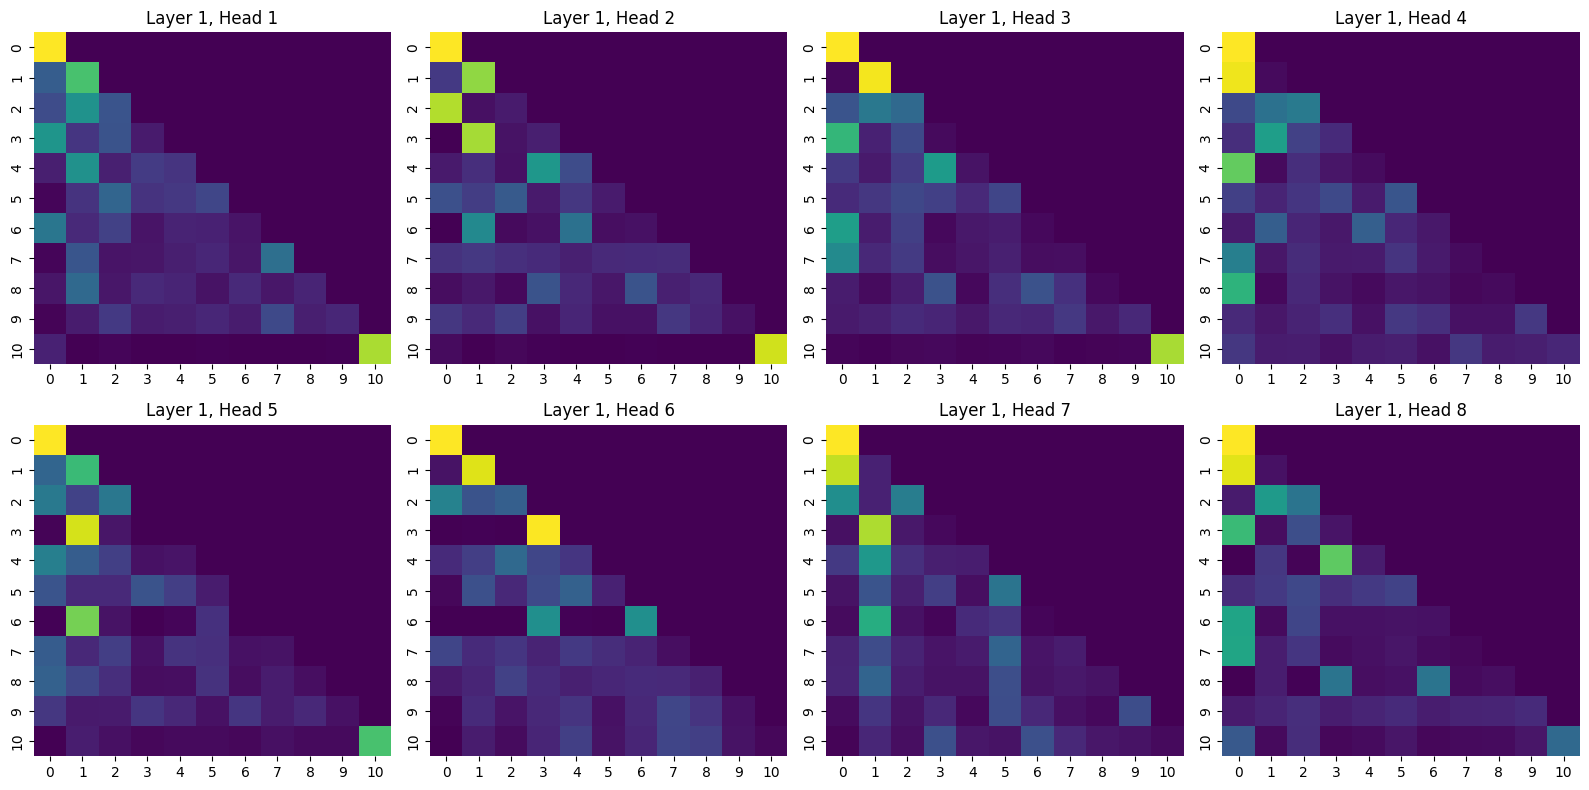

In [ ]:
value1 = attn_weights['decoder_layer1_block1']
plot_attention_heatmaps(value1, input, model_output)

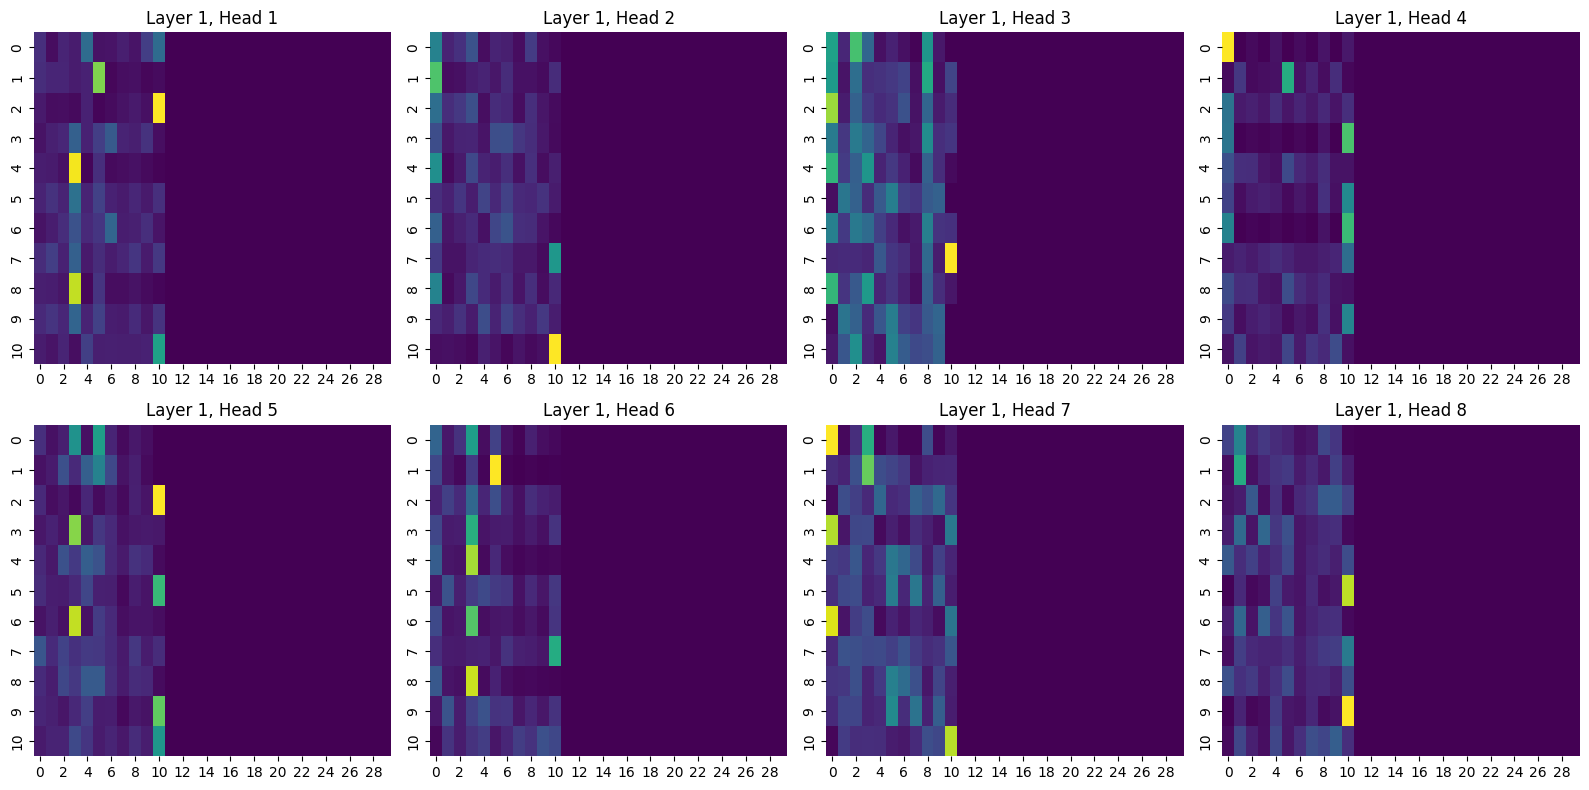

In [ ]:
value2 = attn_weights['decoder_layer1_block2']
plot_attention_heatmaps(value2, input, model_output)

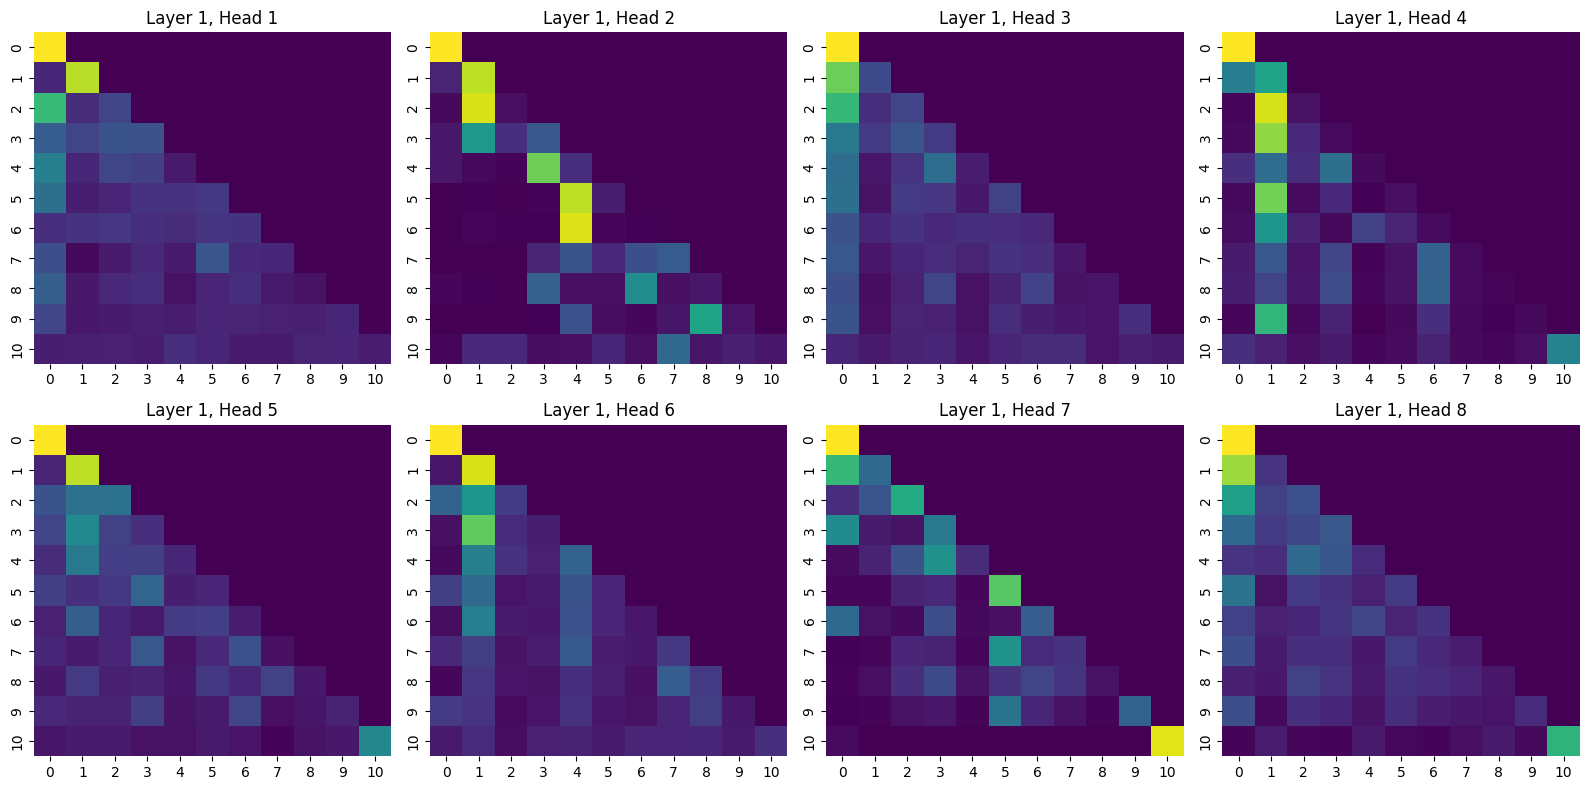

In [ ]:
value3 = attn_weights['decoder_layer2_block1']
plot_attention_heatmaps(value3, input, model_output)

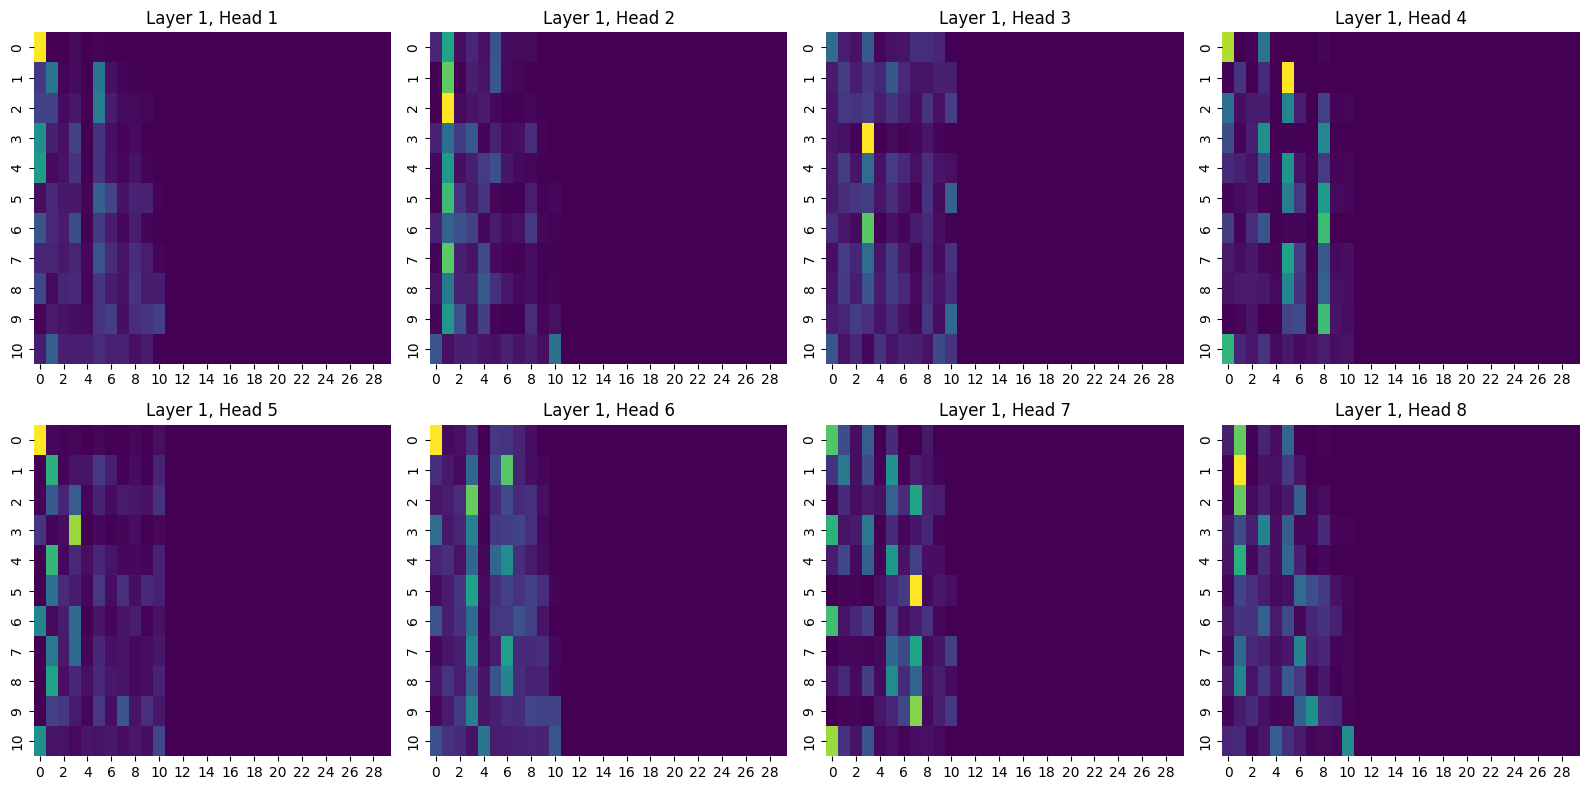

In [ ]:
value4 = attn_weights['decoder_layer2_block2']
plot_attention_heatmaps(value4, input, model_output)

### Transformers Epoch 10 수행

In [ ]:
wandb_logger = WandbLogger(project="NLP_Transformers", name="Transformer_Assignmnet_epoch10", group="Lec06_Assignment")

trainer = pl.Trainer(
    max_epochs=10,
    accelerator="gpu",
    logger=wandb_logger
)

trainer.fit(model_pl, train_loader, vali_loader)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name      | Type             | Params
-----------------------------------------------
0 | model     | Transformer      | 5.0 M 
1 | criterian | CrossEntropyLoss | 0     
-----------------------------------------------
5.0 M     Trainable params
0         Non-trainable params
5.0 M     Total params
20.163    Total estimated model params size (MB)
INFO:light

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=10` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


In [ ]:
test_data = test_dataset.__getitem__(234)
a, attn_weights = model_pl.decode(test_data["src"].unsqueeze(0))
print("attn_weights keys:", attn_weights.keys())

input = " ".join([list(en_vocab.keys())[list(en_vocab.values()).index(i)] for i in test_data["src"]])
target = " ".join([list(fr_vocab.keys())[list(fr_vocab.values()).index(i)] for i in test_data["trg"]])
model_output = " ".join([list(fr_vocab.keys())[list(fr_vocab.values()).index(i)] for i in a])

print("Input (English):", input)
print("Target (French):", target)
print("Model Output (French):", model_output)

attn_weights keys: dict_keys(['decoder_layer1_block1', 'decoder_layer1_block2', 'decoder_layer2_block1', 'decoder_layer2_block2'])
Input (English): i thought that you d want to see this movie . [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Target (French): [SOS] je pensais que tu voudrais voir ce film . [EOS] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Model Output (French): [SOS] je pensais que vous voudriez voir ce film . [EOS]


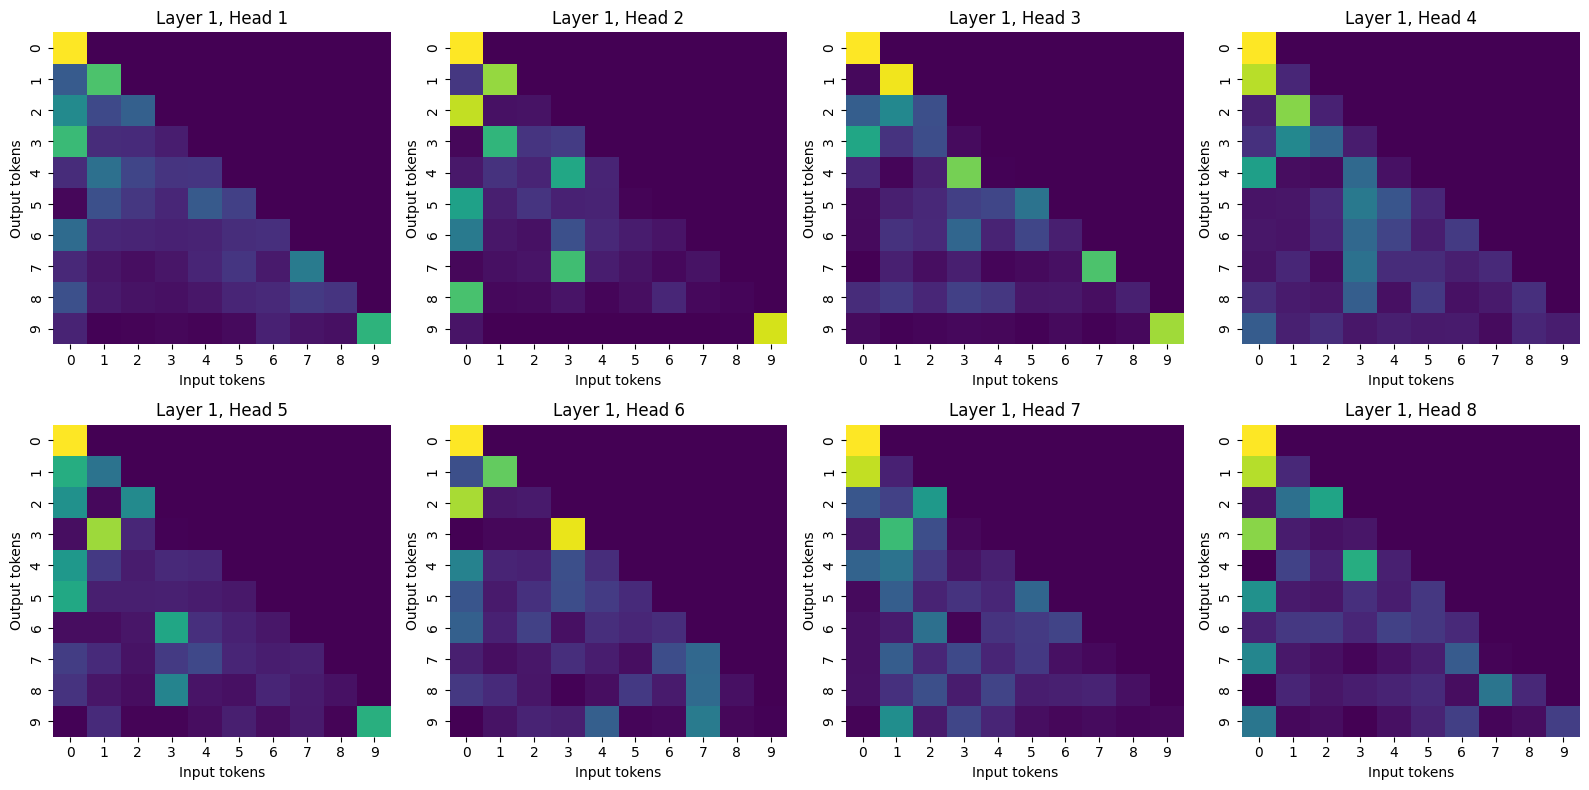

In [ ]:
value1 = attn_weights['decoder_layer1_block1']
plot_attention_heatmaps(value1, input, model_output)

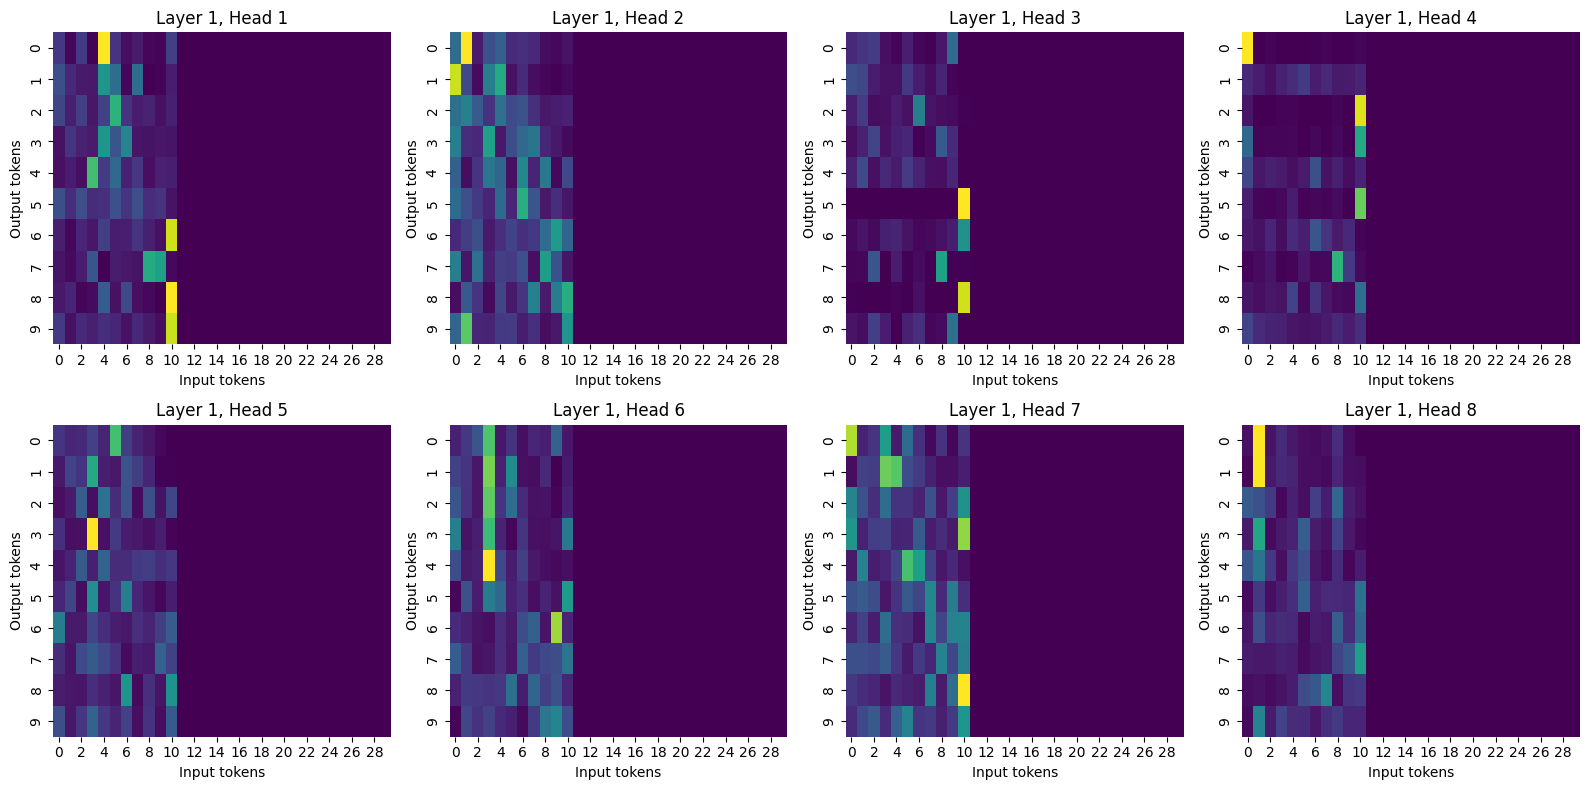

In [ ]:
value2 = attn_weights['decoder_layer1_block2']
plot_attention_heatmaps(value2, input, model_output)

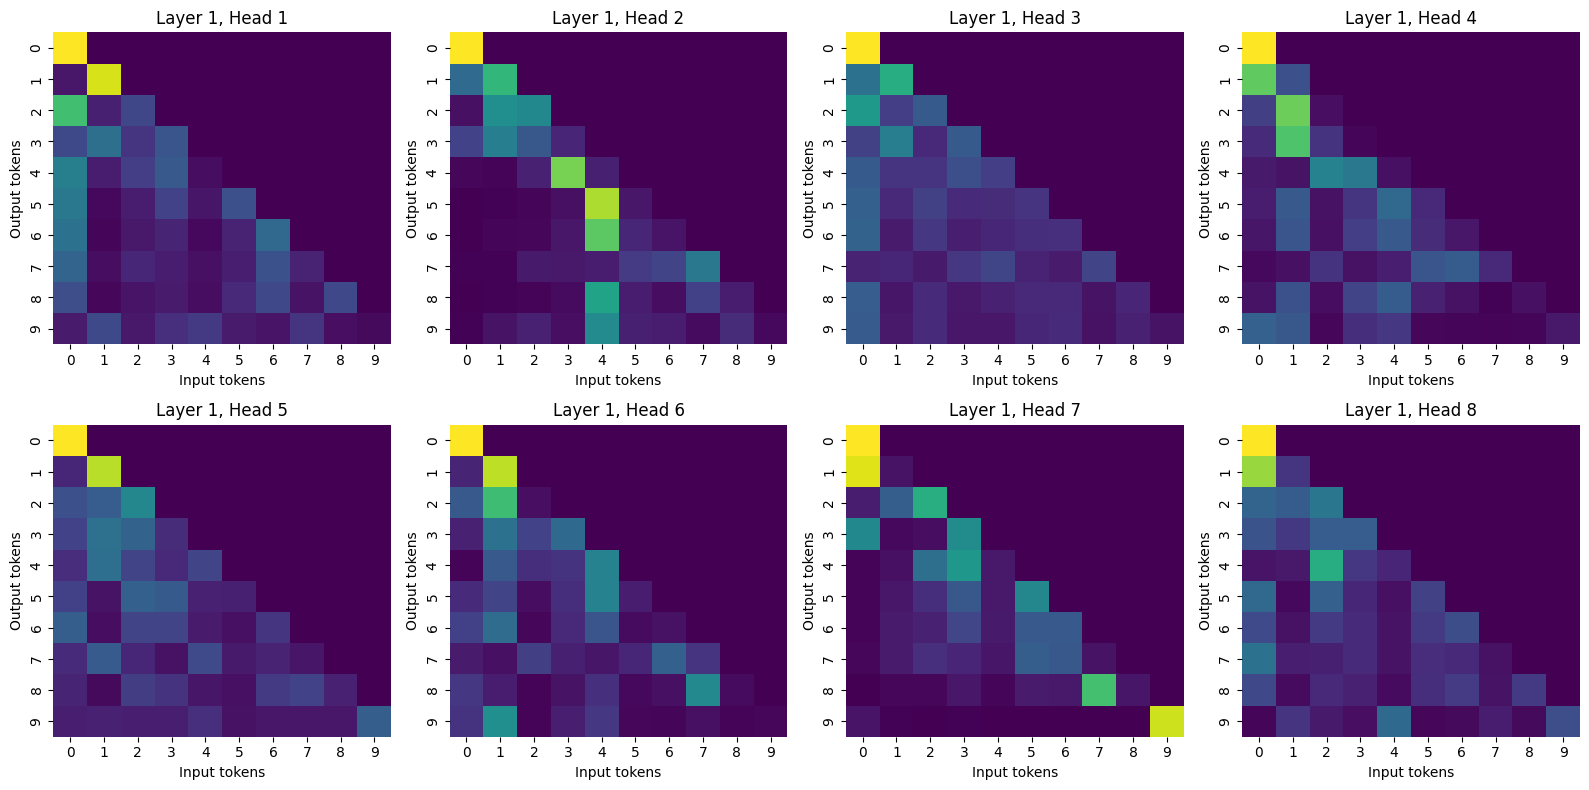

In [ ]:
value3 = attn_weights['decoder_layer2_block1']
plot_attention_heatmaps(value3, input, model_output)

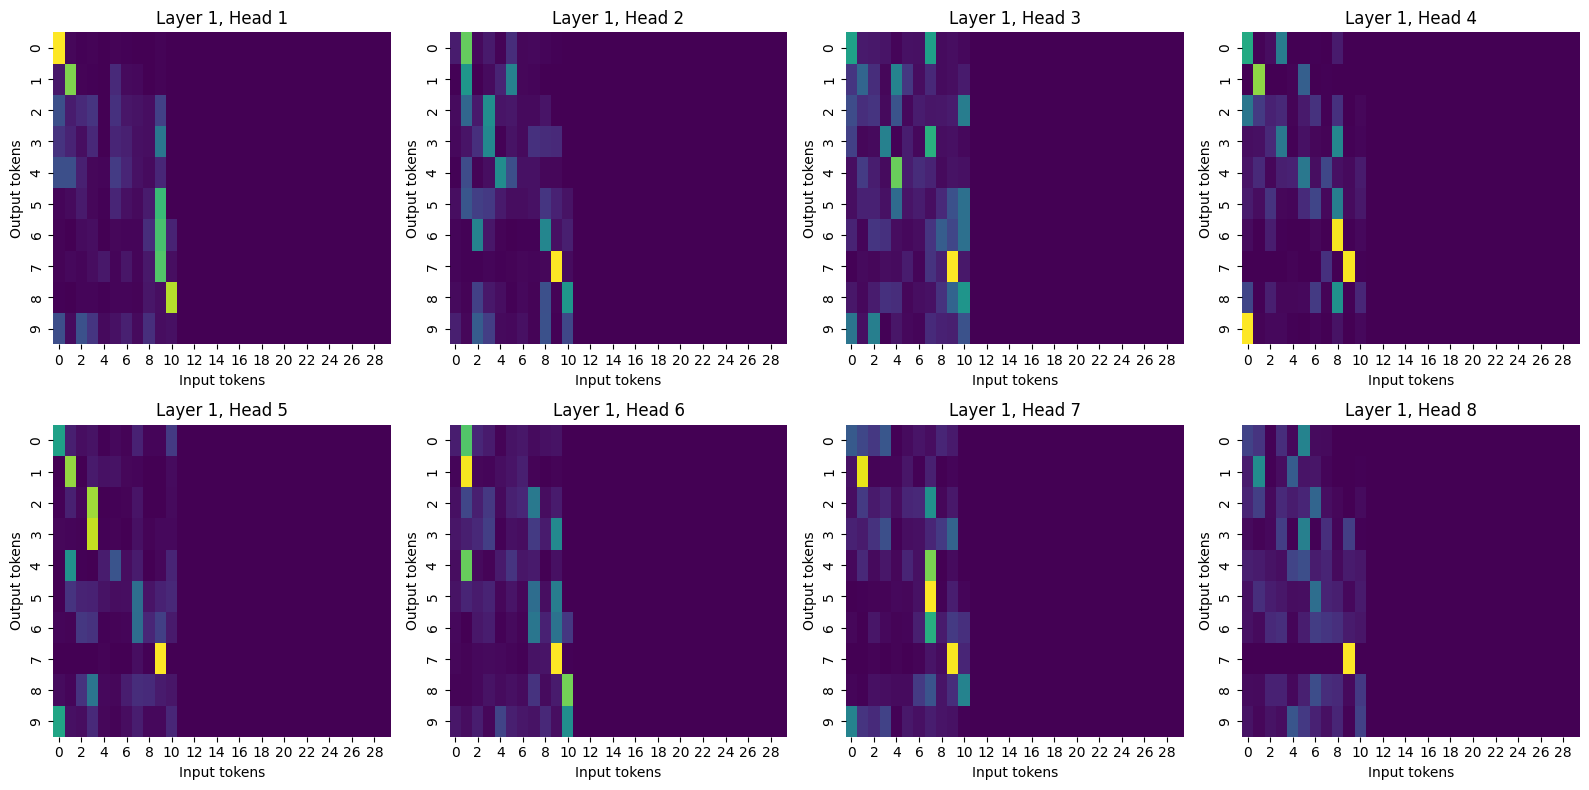

In [ ]:
value4 = attn_weights['decoder_layer2_block2']
plot_attention_heatmaps(value4, input, model_output)

## 2. Transformer의 장점, 단점 (50점)

* RNN 계열 모델, CNN 계열 모델에 대비 Transformer의 장단점을 서술하시오.
    * 지금까지한 실습, 과제를 기반해 근거를 제시하시오.